In [1]:
#!pip install wordcloud

In [2]:
#!pip install pandas

In [3]:
#!pip install scipy

In [4]:
#!pip install sklearn

In [5]:
#!pip install seaborn

In [6]:
#!pip install scikit-learn

In [7]:
#!pip install wordcloud

In [8]:
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import os

import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from textblob import TextBlob, Word

from nltk.stem.snowball import SnowballStemmer
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image

import nltk
from langdetect import detect
from wordcloud import WordCloud

In [9]:
yelp = pd.read_csv('restaurant.csv')
yelp.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [10]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


Text(0.5, 1.0, 'Stars Distribution')

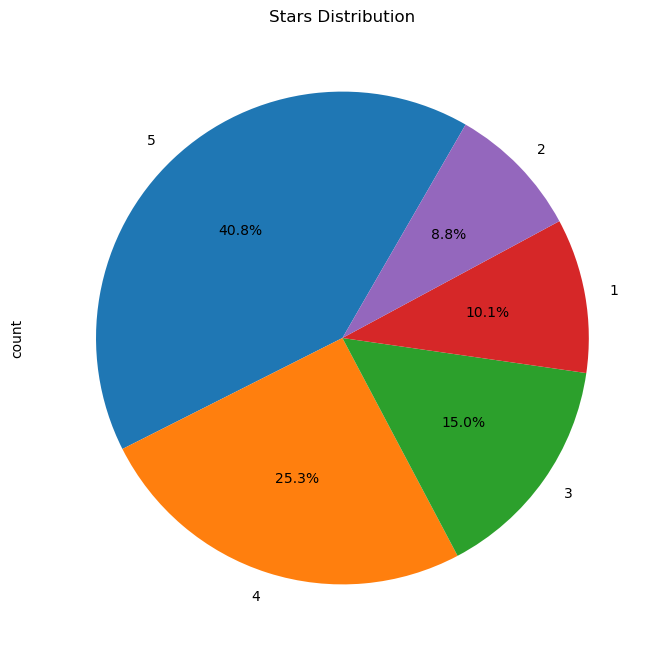

In [11]:
plt.figure(figsize=(8,8))
yelp['stars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Stars Distribution')

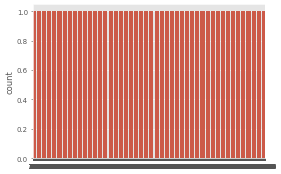

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(6,4), dpi=50)
sns.countplot(yelp.stars);

In [13]:
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word cloud Saved Successfully')
    path = 'wc.png'
    display(Image.open(path))

In [14]:
text1 = yelp[yelp['stars']==1]

Word cloud Saved Successfully


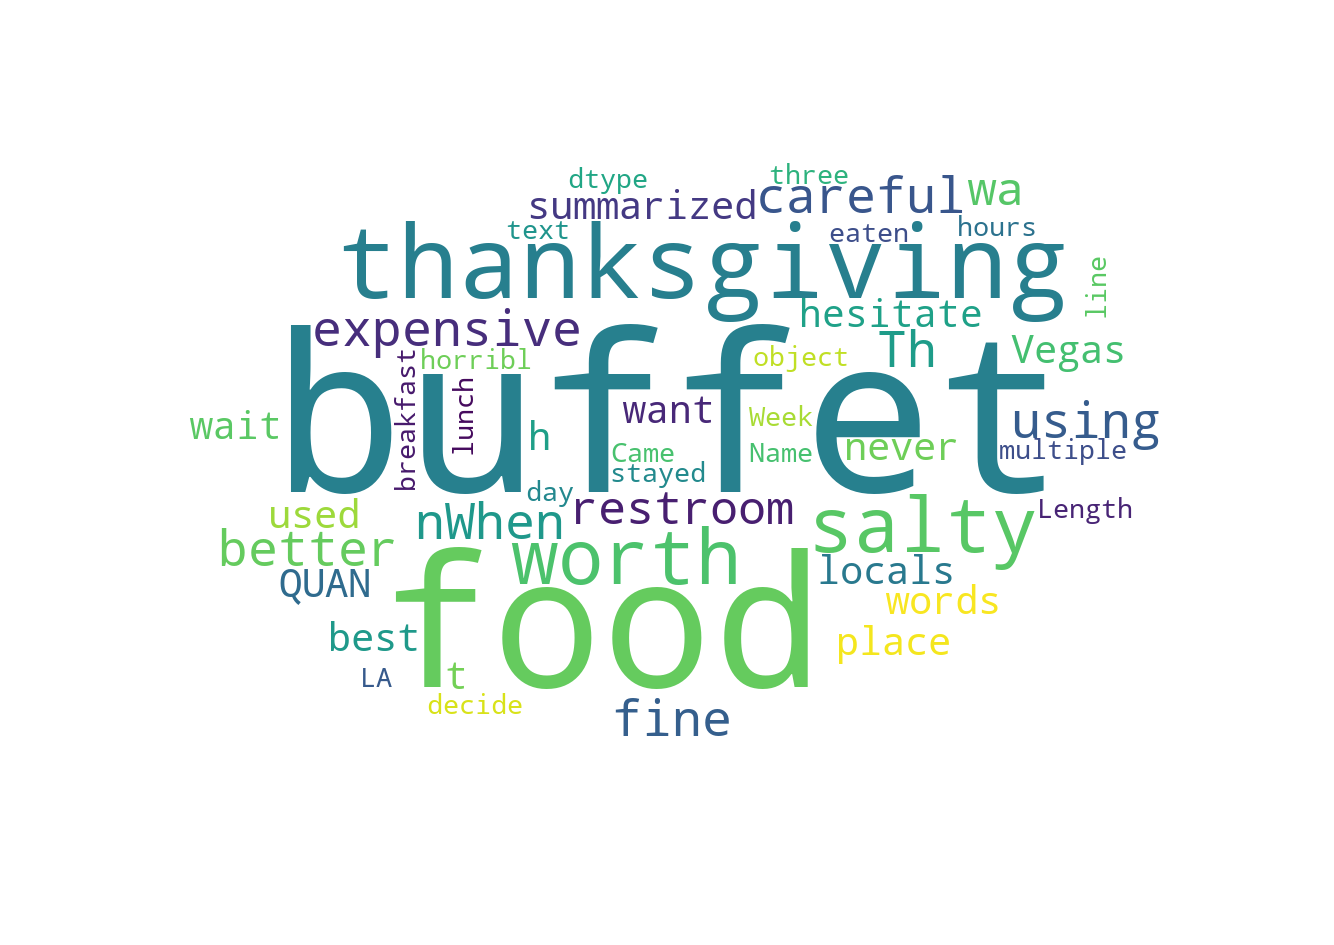

In [15]:
create_wordcloud(text1.text)

In [16]:
yelp.loc[yelp['stars']>3, 'sentiment']='positive'
yelp.loc[yelp['stars']<3, 'sentiment']='negative'
yelp.loc[yelp['stars']==3, 'sentiment']='neutral'

([<matplotlib.patches.Wedge at 0x26011d12730>,
 [Text(-0.5321893333270193, 0.9626912867025145, 'Positive'),
  Text(0.03764542973995101, -1.099355639281345, 'Negative'),
  Text(0.9803405607016918, -0.4989312428011425, 'Neutral')],
 [Text(-0.2902850909056469, 0.5251043382013715, '66.1%'),
  Text(0.020533870767246002, -0.5996485305170972, '18.9%'),
  Text(0.5347312149281955, -0.2721443142551686, '15.0%')])

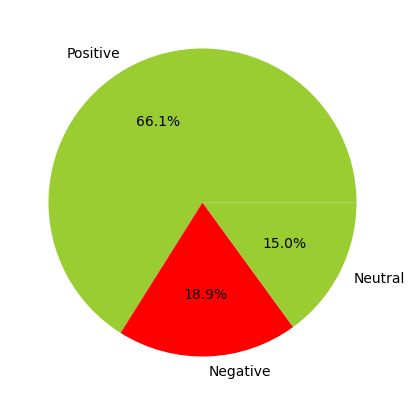

In [17]:
pie_sentiment=yelp.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5))
labels='Positive', 'Negative', 'Neutral'
colors=['yellowgreen','red']
plt.pie(pie_sentiment,colors=colors, labels=labels,autopct='%1.1f%%')

In [18]:
yelp['text']=yelp['text'].str.lower()

In [20]:
yelp['text']=yelp['text'].str.replace('[^\w\s]','')

In [21]:
yelp['text']=yelp['text'].str.replace('\d+', '')

In [22]:
yelp['text']= yelp['text'].str.replace('\n',' ').replace('\r','')

In [23]:
yelp['language']=yelp['text'].apply(detect)

In [24]:
yelp_new = yelp[['stars', 'sentiment', 'text']]

In [25]:
noneng = yelp_new[yelp_new['text'].apply(detect)!='en']

In [26]:
yelp=yelp_new[yelp_new['text'].apply(detect)=='en']

In [27]:
yelp.sentiment.value_counts()

sentiment
positive    6854
negative    1964
neutral     1557
Name: count, dtype: int64

In [28]:
yelp[['polarity','subjectivity']]=yelp['text'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))

In [29]:
yelp_best_worst=yelp[(yelp.stars==2)|(yelp.stars==1)]

yelp_best_worst.reset_index(drop=True, inplace=True)

x=yelp_best_worst.text
y=yelp_best_worst.stars

print(x.shape)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=11)

(1964,)


In [30]:
x

0       not worth it! too salty food and expensive! th...
1       food is fine, better than most buffets.  when ...
2       so i come here on my birthday thinking it's th...
3       be careful using the restroom here. while i wa...
4       what a money pit! food was terrible and not la...
                              ...                        
1959    i  have eaten here for the breakfast and lunch...
1960    in thanksgiving day i stayed in line for three...
1961    i went to the wicked spoon at cosmopolitan and...
1962    i am one disappointed buffet-loving foodie. :-...
1963    came him from la! thanksgiving week. we decide...
Name: text, Length: 1964, dtype: object

In [31]:
vect = CountVectorizer(stop_words='english')
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 179)	1
  (0, 2190)	2
  (0, 7261)	1
  (0, 53)	1
  (0, 137)	1
  (0, 88)	1
  (0, 6275)	1
  (0, 5328)	1
  (0, 6219)	2
  (0, 1575)	1
  (0, 2192)	1
  (0, 625)	1
  (0, 2979)	1
  (0, 737)	1
  (0, 5029)	1
  (0, 3057)	1
  (0, 6223)	1
  (0, 7214)	1
  (0, 2332)	1
  (0, 5724)	1
  (0, 308)	1
  (1, 5952)	2
  (1, 4353)	1
  (1, 7996)	1
  (1, 3333)	1
  :	:
  (1471, 2656)	1
  (1471, 7640)	1
  (1471, 3443)	1
  (1472, 5046)	1
  (1472, 5584)	1
  (1472, 1826)	1
  (1472, 4114)	1
  (1472, 5895)	1
  (1472, 3946)	1
  (1472, 7727)	1
  (1472, 930)	1
  (1472, 2573)	1
  (1472, 4622)	1
  (1472, 4451)	1
  (1472, 4882)	1
  (1472, 4483)	1
  (1472, 4167)	1
  (1472, 6439)	1
  (1472, 4262)	1
  (1472, 5586)	1
  (1472, 4889)	1
  (1472, 4499)	1
  (1472, 6271)	1
  (1472, 4764)	1
  (1472, 2104)	1


In [32]:
print(x_test)

1676    one of the biggest food disappointments of my ...
508     so, i was excited to go to the bacchanal buffe...
647     this review is based on my third and last visi...
460     i give 2 stars because it is an over price buf...
828     where do i even begin... when you first walk i...
                              ...                        
1600    the wait time is way out of the ying to the ya...
311     read all the glowing reviews and was excited t...
1719    i loved bacchanal when i first came here in 20...
1745    i was super excited to go here! was very disap...
44      $178 for two ppl.  at this price- so not worth...
Name: text, Length: 491, dtype: object


In [36]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names_out())
tf.head()

,00,000,00am,00pm,01,02,03am,04,04pm,05,...,而且不夠熱,裡面地方很大,距離太遠,跟其他所有菜一樣,跟周圍的亞洲款菜式一樣,跟雪蟹混在一起,还要至少拍一个小时队,過了下午六點後才拿出來,食材不新鲜,龍蝦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
